In [1]:
import pandas as pd
import numpy as np
import matplotlib as npl
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)

In [2]:
df = pd.read_csv("mcu_box_office.csv")
df.head(10)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


In [3]:
df.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [4]:
df.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [5]:
df.shape

(27, 10)

In [6]:
df.size

270

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [8]:
df.isnull().any()

movie_title             False
mcu_phase               False
release_date            False
tomato_meter            False
audience_score          False
movie_duration          False
production_budget       False
opening_weekend         False
domestic_box_office     False
worldwide_box_office    False
dtype: bool

In [9]:
df.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

<b>Converting the budgets from objects into number

In [10]:
df['production_budget']= df['production_budget'].str.split(',').str.join("").astype(float)
df['opening_weekend']= df['opening_weekend'].str.split(',').str.join("").astype(float)
df[ 'domestic_box_office']= df['domestic_box_office'].str.split(',').str.join("").astype(float)
df['worldwide_box_office']= df[ 'worldwide_box_office'].str.split(',').str.join("").astype(float)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           27 non-null     object 
 1   mcu_phase             27 non-null     int64  
 2   release_date          27 non-null     object 
 3   tomato_meter          27 non-null     int64  
 4   audience_score        27 non-null     int64  
 5   movie_duration        27 non-null     int64  
 6   production_budget     27 non-null     float64
 7   opening_weekend       27 non-null     float64
 8   domestic_box_office   27 non-null     float64
 9   worldwide_box_office  27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


<b>Converting Release date to datetime object.

In [12]:
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           27 non-null     object        
 1   mcu_phase             27 non-null     int64         
 2   release_date          27 non-null     datetime64[ns]
 3   tomato_meter          27 non-null     int64         
 4   audience_score        27 non-null     int64         
 5   movie_duration        27 non-null     int64         
 6   production_budget     27 non-null     float64       
 7   opening_weekend       27 non-null     float64       
 8   domestic_box_office   27 non-null     float64       
 9   worldwide_box_office  27 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 2.2+ KB


<b>Does the data contain any duplicate rows?

In [13]:
df.duplicated().any()

False

<b>Data Visualization

<b>Rotten Tomatoes Scores for each Marvel Movie

<function matplotlib.pyplot.show(close=None, block=None)>

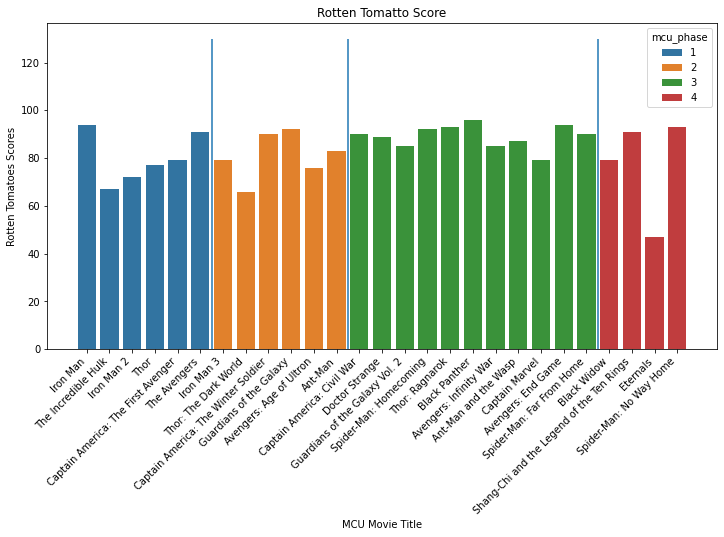

In [14]:
fiq, ax = plt.subplots(figsize= (12,6))
sns.barplot(x ="movie_title", y = "tomato_meter", data = df, hue="mcu_phase", dodge= False)
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=130)
labels = ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')
plt.ylabel("Rotten Tomatoes Scores")
plt.xlabel("MCU Movie Title")
plt.title("Rotten Tomatto Score")
plt.show


<b>Audience Scores for each Movie

<function matplotlib.pyplot.show(close=None, block=None)>

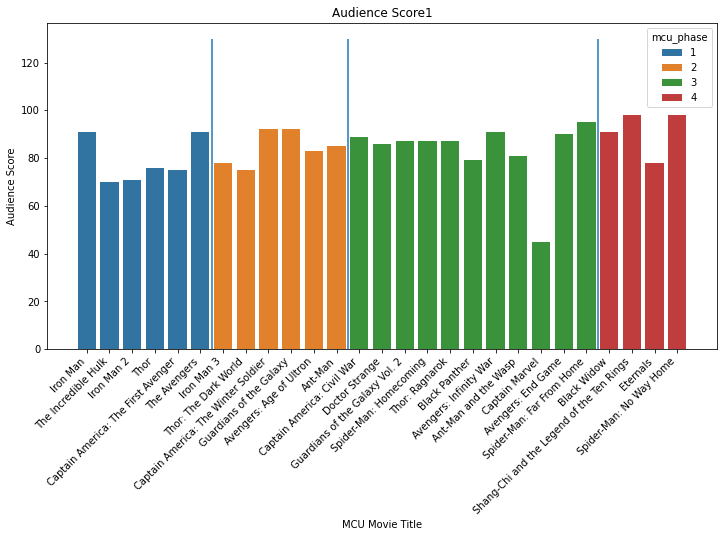

In [15]:
fiq, ax=plt.subplots(figsize=(12,6))
sns.barplot( x= "movie_title", y= "audience_score", data= df, hue="mcu_phase",dodge= False)
labels = ax.get_xticklabels()
plt.vlines(x=(5.5, 11.5, 22.5), ymin=0, ymax=130)
plt.setp(labels,rotation=45,horizontalalignment='right')
plt.ylabel("Audience Score")
plt.xlabel("MCU Movie Title")
plt.title("Audience Score1")
plt.show

<b>Comparing the Audience vs RT Scores for each MCU Phase

In [16]:
compareScore= pd.melt(df,id_vars=('movie_title','mcu_phase'), 
    value_vars=('tomato_meter','audience_score'), value_name='Score', var_name='type')
compareScore.head(10)

,movie_title,mcu_phase,type,Score
0,Iron Man,1,tomato_meter,94
1,The Incredible Hulk,1,tomato_meter,67
2,Iron Man 2,1,tomato_meter,72
3,Thor,1,tomato_meter,77
4,Captain America: The First Avenger,1,tomato_meter,79
5,The Avengers,1,tomato_meter,91
6,Iron Man 3,2,tomato_meter,79
7,Thor: The Dark World,2,tomato_meter,66
8,Captain America: The Winter Soldier,2,tomato_meter,90
9,Guardians of the Galaxy,2,tomato_meter,92


In [17]:
compareScore.tail()

,movie_title,mcu_phase,type,Score
49,Spider-Man: Far From Home,3,audience_score,95
50,Black Widow,4,audience_score,91
51,Shang-Chi and the Legend of the Ten Rings,4,audience_score,98
52,Eternals,4,audience_score,78
53,Spider-Man: No Way Home,4,audience_score,98


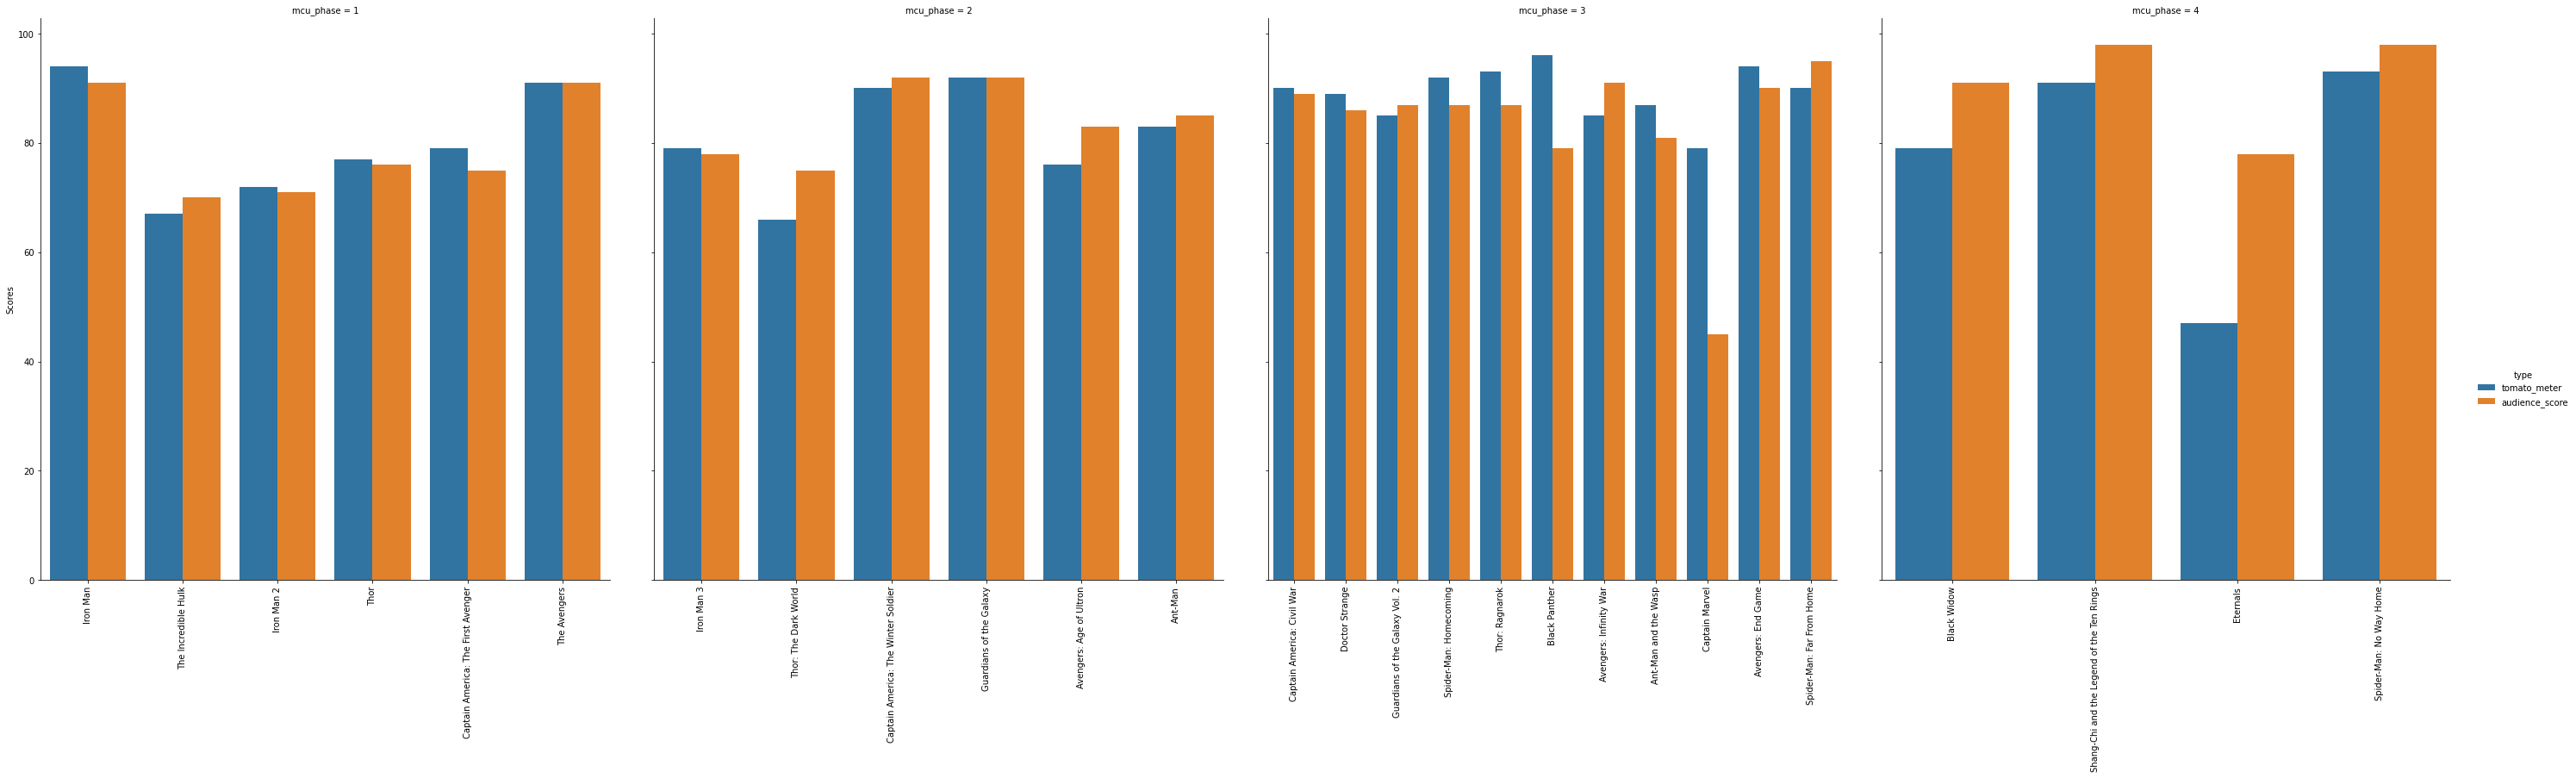

In [18]:
g = sns.catplot(x="movie_title", y="Score",
            data=compareScore, hue="type", col="mcu_phase", kind="bar", dodge=True, sharex=False, aspect=1, height=10)
g.set_xticklabels(rotation = 90)
g.set_axis_labels("","Scores")

<b>How different movies split RT critics vs Audience</b> <p></P>
Positive Value = Higher rotten tomatoes score Negative Value = Higher Audience score

Text(0, 0.5, 'Score')

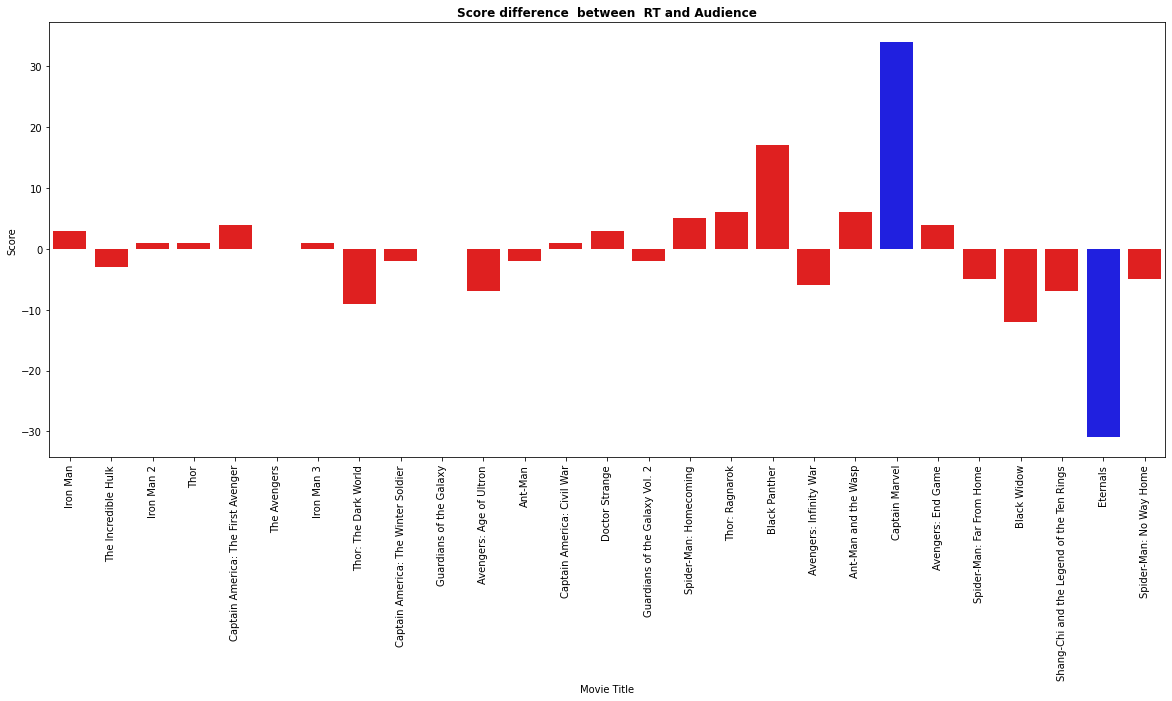

In [19]:
df["diffScore"]= df["tomato_meter"] -  df["audience_score"]
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)

clr = ['red' if (min(df.diffScore))<x<max(df.diffScore) else "blue" for x in df.diffScore]

sns.barplot(x = "movie_title", y = "diffScore", data = df, palette= clr, dodge= False)
plt.title("Score difference  between  RT and Audience", fontweight= "bold")
plt.xlabel("Movie Title")
plt.ylabel("Score")

<b>How long were the movies?

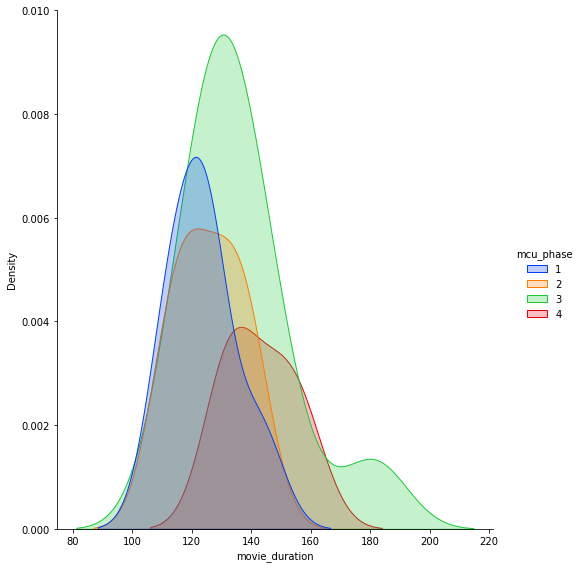

In [20]:
sns.displot(data= df, x="movie_duration",hue ="mcu_phase", kind= 'kde', 
    fill=True,palette=sns.color_palette('bright')[:4], height=8, aspect=0.9 )

<b>Have the movies gotten longer?

<AxesSubplot:xlabel='movie_title', ylabel='movie_duration'>

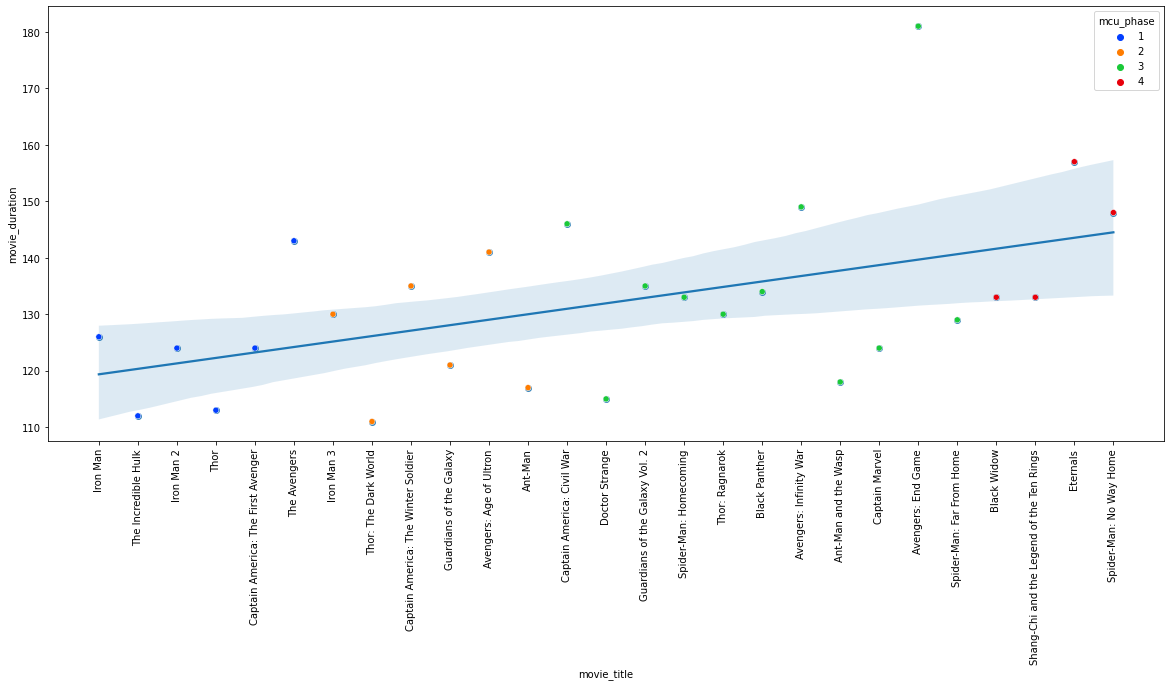

In [21]:
plt.figure(figsize=(20,8))
plt.xticks(rotation= 90)
sns.regplot(x=df.index, y="movie_duration", data= df)
sns.scatterplot(x='movie_title', y ="movie_duration", data= df, hue= "mcu_phase", 
    palette=sns.color_palette('bright')[:4])

<b>How much money did the movies make?

In [22]:
movieBudget= pd.melt(df, id_vars=("movie_title", "mcu_phase"), value_vars=(
    "production_budget", "opening_weekend", "domestic_box_office", "worldwide_box_office"), 
    value_name="budget_value", var_name="budget_type")

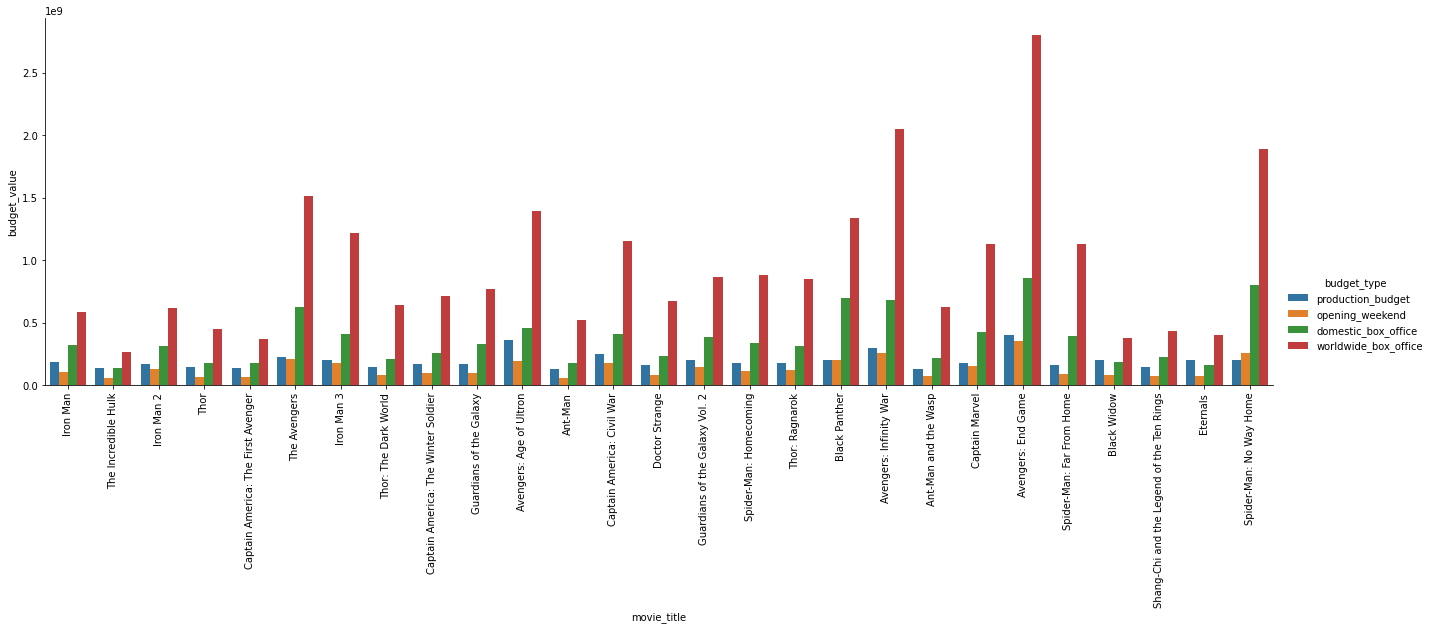

In [23]:
g= sns.catplot(x="movie_title", y = "budget_value", data= movieBudget, hue="budget_type", kind="bar", dodge=True,sharex=False,
    aspect=3, height=6)
g.set_xticklabels(rotation=90)

<b> How did the cost of making marvel movies change overtime?

<AxesSubplot:xlabel='movie_title', ylabel='production_budget'>

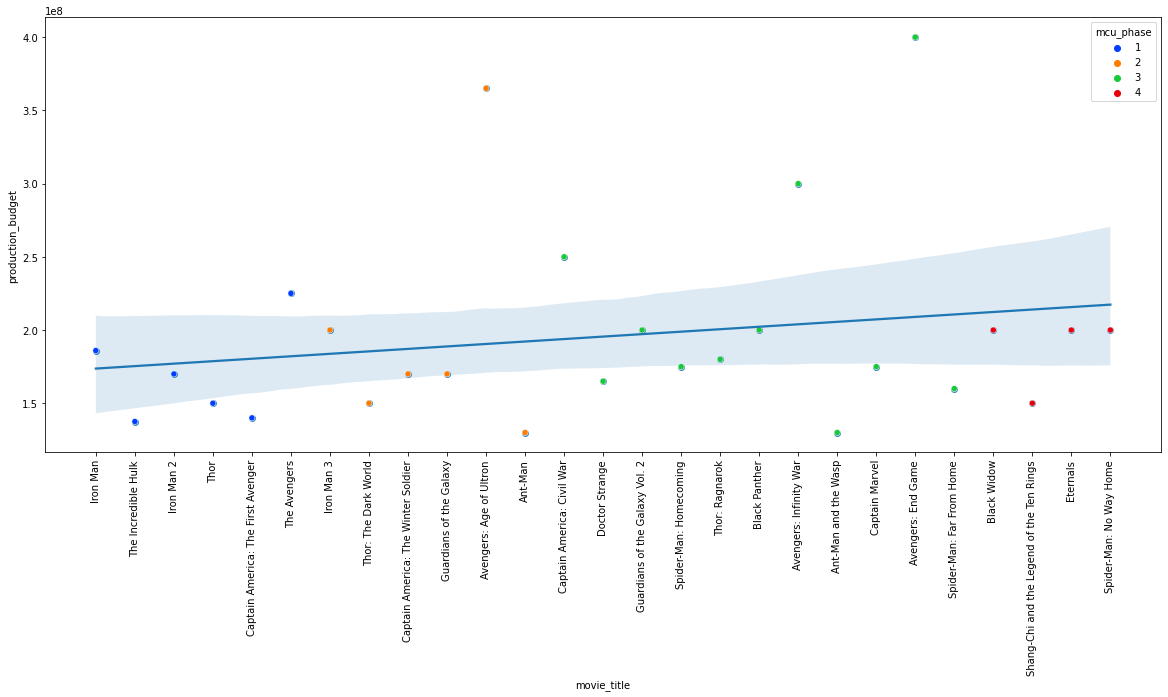

In [24]:
plt.figure(figsize=(20,8))
plt.xticks(rotation= 90)
sns.regplot(x=df.index, y="production_budget", data= df)
sns.scatterplot(x = "movie_title", y = "production_budget", data= df, hue="mcu_phase", 
    palette=sns.color_palette("bright")[:4])

It looks like the budget remained fairly consistent over time.

<b>How does the revenue generated change over time?

<AxesSubplot:xlabel='movie_title', ylabel='worldwide_box_office'>

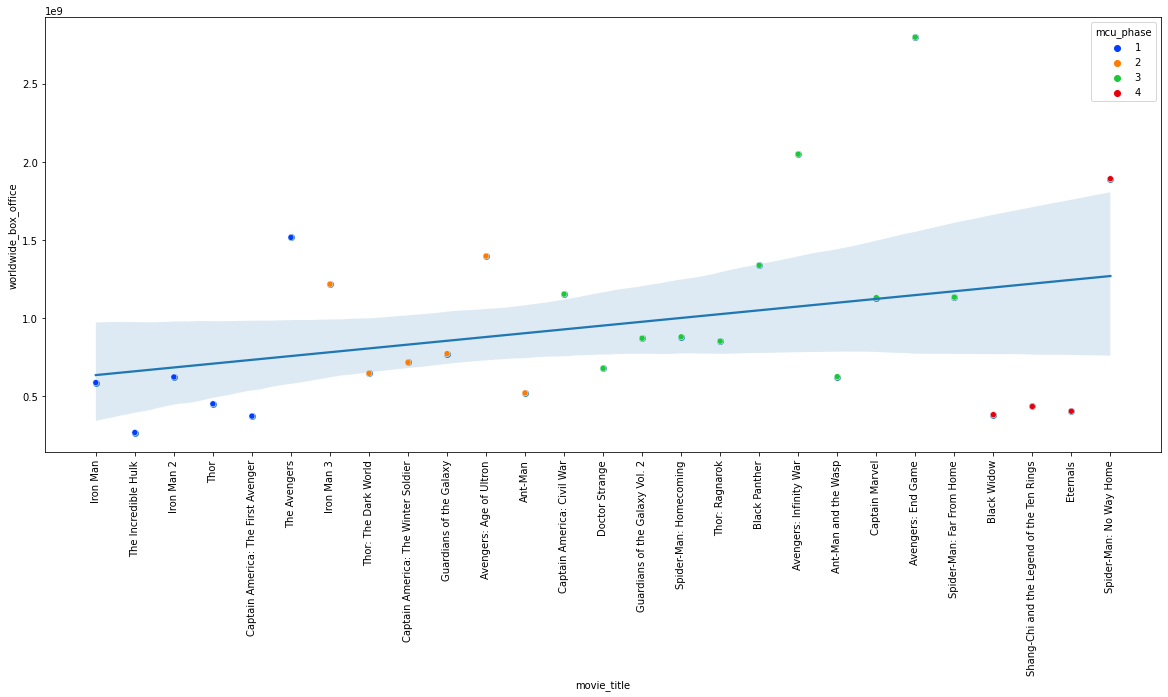

In [26]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sns.regplot(x= df.index, y="worldwide_box_office", data= df)
sns.scatterplot(x="movie_title", y = "worldwide_box_office", data = df, hue="mcu_phase",
    palette=sns.color_palette("bright")[:4])

We see a slight upwards trend here.

<b>Look at the profit margin

In [27]:
df["percentProfitMargin"]= (df["worldwide_box_office"] - df["production_budget"])/(df["worldwide_box_office"]*100)

<AxesSubplot:xlabel='movie_title', ylabel='percentProfitMargin'>

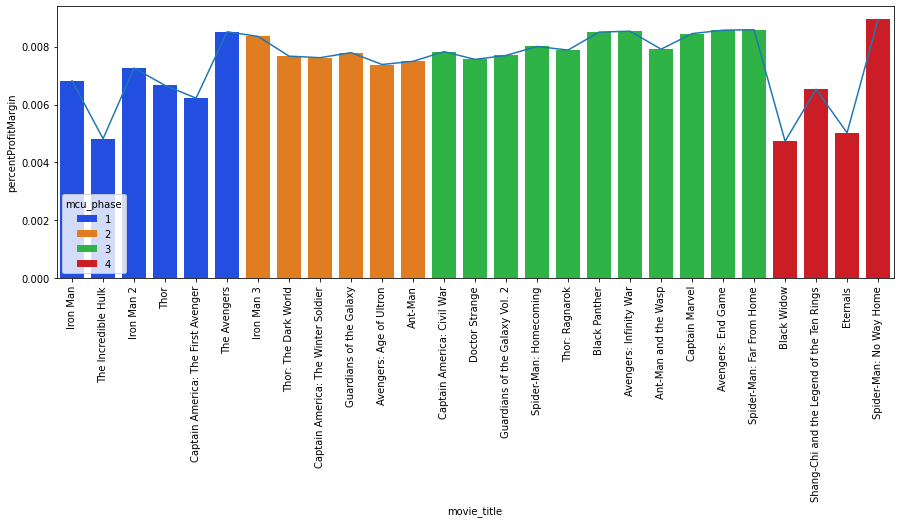

In [31]:
plt.figure(figsize=(15,5))
plt.xticks(rotation= 90)
sns.lineplot(x=df.index,y="percentProfitMargin", data= df)
sns.barplot(x="movie_title", y="percentProfitMargin", data = df, hue="mcu_phase", palette=sns.color_palette("bright")[:4]
    ,dodge=False)

<b>Breaking down the best performing movies by their domestic vs international box office revenue

<AxesSubplot:xlabel='movie_title'>

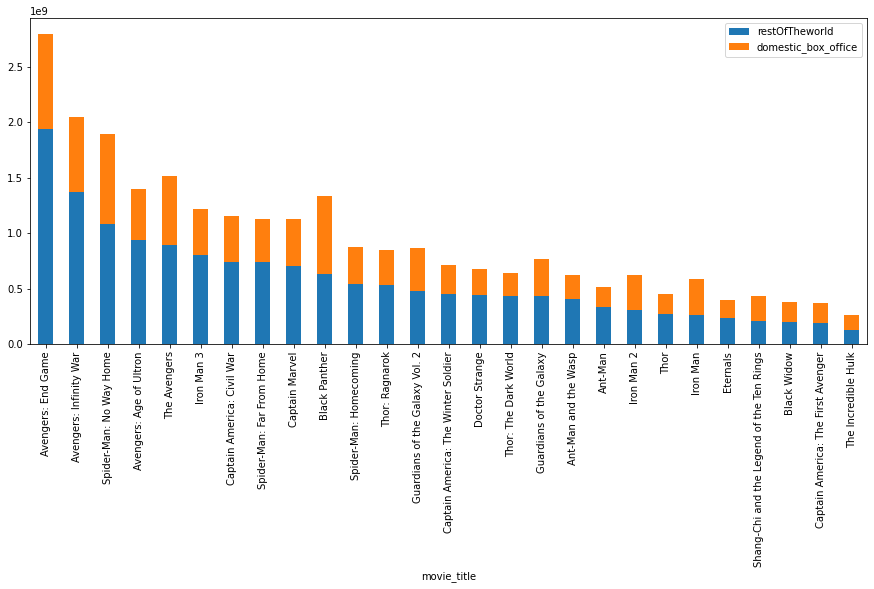

In [32]:
df["restOfTheworld"] = df.worldwide_box_office - df.domestic_box_office
bestOffice= df[["movie_title","restOfTheworld","domestic_box_office"]]
bestOffice = bestOffice.sort_values("restOfTheworld", ascending=False)
boxOfficePlot = bestOffice.set_index('movie_title').plot(kind="bar", stacked= True, figsize=(15,6))

boxOfficePlot


<b>Does Higher Audience score = More Revenue?

<AxesSubplot:xlabel='audience_score', ylabel='worldwide_box_office'>

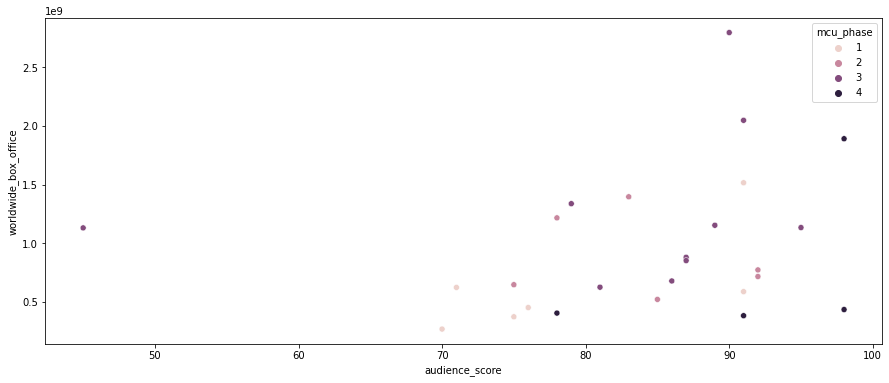

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="audience_score", y="worldwide_box_office", data=df, hue="mcu_phase")